In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import shutil
import datetime
from dateutil.rrule import rrule, MONTHLY

In [2]:
#generated_path = 'E:\\dtuklaptop\\e\\Users\\Mat\\python\\data\\property\\checked\\'
generated_path = 'J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//'

def sumOf(df,cat):
    g=pd.Grouper(freq="ME")
    return df.loc[df.Cat == cat,'Amount'].groupby(g).sum()

def sumOfSubcat(df,subcat):
    g=pd.Grouper(freq="ME")
    return df.loc[df.Subcat ==subcat,'Amount'].groupby(g).sum()


def get_pty_summary(df):
    dfPty = pd.DataFrame()
    dfPty['Mortgage']=sumOf(df,'Mortgage')
    dfPty['PropertyExpense']=sumOf(df,'PropertyExpense')
    dfPty['ServiceCharge']=sumOf(df,'ServiceCharge')
    dfPty['OurRent']=sumOf(df,'OurRent')
    dfPty['BealsRent']=sumOf(df,'BealsRent')

    dfPty = dfPty.fillna(0)

    dfPty['TotalRent']=dfPty['OurRent'] + dfPty['BealsRent']
    dfPty['NetProfit']=dfPty['OurRent'] + dfPty['BealsRent'] + dfPty['Mortgage'] + dfPty['PropertyExpense'] + dfPty['ServiceCharge']
    #dfPty['Withdrawls']=sumOf(df,'Withdrawls')
    
    return dfPty

def plot_properties_income_expenditure(dfPty, start, end):
    dfBar=pd.DataFrame()
    dfBar['OurRent'] = dfPty.loc[start:end]['OurRent']
    dfBar['BealsRent'] = dfPty.loc[start:end]['BealsRent']
    dfBar['Mortgage'] = abs(dfPty.loc[start:end]['Mortgage'])
    dfBar['PropertyExpense'] = abs(dfPty.loc[start:end]['PropertyExpense'])
    dfBar['ServiceCharge'] = abs(dfPty.loc[start:end]['ServiceCharge'])
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['Mortgage','PropertyExpense','ServiceCharge']].plot.bar(stacked=True, position=1, width=.3, color=['red','blue','orange'])
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.axhline(15000, color="gray",linestyle='--')
    ax.axhline(20000, color="gray",linestyle='--')
    dfBar[['BealsRent','OurRent']].plot.bar(stacked=True,ax=ax, position=0, width=.3, color=['pink','darkgreen'],figsize=(30,15),fontsize=20).legend(loc=2, prop={'size': 20})

def plot_properties_net_income(dfPty, start, end):
    dfBar=pd.DataFrame()

    dfBar['NetProfit'] = dfPty.loc[start:end]['NetProfit']
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['NetProfit']].plot.bar(stacked=True, position=1, width=.3, color=['blue'],figsize=(30,15),fontsize=20)
    ax.axhline(0, color="gray",linestyle='-')
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.axhline(15000, color="gray",linestyle='--')
    ax.axhline(20000, color="gray",linestyle='--')

    ax.legend(loc=2, prop={'size': 20})
    
def get_outgoings(df):
    dfOut = pd.DataFrame()
    dfOut['MTPersonal']=sumOf(df.loc[(df['Account'] == "20-74-09 60458872")],'PersonalExpense')
    dfOut['MTCar'] = (
    sumOfSubcat(df, 'MTCar').fillna(0)
    .add(sumOf(df, 'Car').fillna(0), fill_value=0)
    )
    dfOut['IVPersonal']=sumOf(df.loc[~(df['Account'] == "20-74-09 60458872")],'PersonalExpense')
    dfOut['IVCar']=sumOfSubcat(df,'IVCar') 
    dfOut['SFLoan']=sumOfSubcat(df,'SFLoan') 
    dfOut['Hilltop']=sumOf(df,'Hilltop')
    
    dfOut['RegularPayment'] = sumOf(
        df.loc[~df['Subcat'].isin(['MTCar','IVCar','SFLoan'])],
        'RegularPayment'
    )
    
    dfOut['SchoolFee']=sumOf(df,'SchoolFee')
    dfOut['HMRCDD']=sumOf(df,'HMRCDD')
    dfOut['HMRCPayment']=sumOf(df,'HMRCPayment')
    dfOut['OtherIncome']=sumOf(df,'OtherIncome')
    dfOut['OtherExpense']=sumOf(df,'OtherExpense')
    dfOut = dfOut.fillna(0)

    dfOut['HMRC']=dfOut['HMRCDD'] + dfOut['HMRCPayment']
    dfOut['TotalOther'] = dfOut['OtherIncome'] + dfOut['OtherExpense']
    dfOut['TotalOutgoings']=dfOut['IVPersonal'] + dfOut['IVCar'] + dfOut['SchoolFee']  + \
        dfOut['Hilltop'] + dfOut['RegularPayment']+dfOut['HMRCDD']+dfOut['HMRCPayment']+dfOut['TotalOther']
    dfOut['TotalOutgoingsExclSchool']=dfOut['IVPersonal'] + dfOut['IVCar'] + dfOut['Hilltop'] + \
        dfOut['RegularPayment']+dfOut['HMRCDD']+dfOut['HMRCPayment']+dfOut['TotalOther']
    return dfOut

    
def plot_outgoings(dfOut, start, end):
    dfBar=pd.DataFrame()
    #dfBar['NetProfit'] = dfOut.loc[start:end]['DataFrame']
    dfBar['IVPersonal'] = abs(dfOut.loc[start:end]['IVPersonal'])
    dfBar['Hilltop'] = abs(dfOut.loc[start:end]['Hilltop'])
    dfBar['SchoolFee'] = abs(dfOut.loc[start:end]['SchoolFee'])
    dfBar['RegularPayment'] = abs(dfOut.loc[start:end]['RegularPayment'])
    dfBar['HMRCDD'] = abs(dfOut.loc[start:end]['HMRCDD'])
    dfBar['IVCar'] = abs(dfOut.loc[start:end]['IVCar'])
    #dfBar['TotalOther'] = dfOut.loc[start:end]['TotalOther']
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['IVPersonal','RegularPayment','Hilltop','HMRCDD','IVCar','SchoolFee']].plot.bar(stacked=True, position=1, width=.3, color=['red','blue','orange','black','green','yellow'],figsize=(30,15),fontsize=20)
    #ax = dfBar[['PersonalExpense','RegularPayment','Hilltop','HMRCDD']].plot.bar(stacked=True, position=1, width=.3, color=['red','blue','orange','black'],figsize=(30,15),fontsize=20)
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.axhline(15000, color="gray",linestyle='--')
    ax.axhline(20000, color="gray",linestyle='--')
    ax.legend(loc=2, prop={'size': 20})
    #dfBar[['TotalOther']].plot.bar(stacked=True,ax=ax, position=0, width=.3, color=['grey'],figsize=(30,15),fontsize=20).legend(loc=2, prop={'size': 20})

def get_personal_spending_summary(df):
    dfPs = pd.DataFrame()
    dfPs['TotalPersonalExpense']=sumOf(df,'PersonalExpense')
    dfPs['Garage']=sumOfSubcat(df,'Garage')
    dfPs['Food']=pd.concat([sumOfSubcat(df,'Tesco'),sumOfSubcat(df,'Garage'),sumOfSubcat(df,'M&S'),\
                            sumOfSubcat(df,'Waitrose'),sumOfSubcat(df,'Morrisons'),sumOfSubcat(df,'LIDL'), \
                            sumOfSubcat(df,'COOP'),sumOfSubcat(df,'Budgens'),sumOfSubcat(df,'Costco'),\
                            sumOfSubcat(df,'A1 Foods'),sumOfSubcat(df,'Sainsburys'),sumOfSubcat(df,'ASDA')],axis=1).sum(axis=1)


    dfPs['Body']=sumOfSubcat(df,'Pharmacy/Opticians/Dental')
    dfPs['Beauty']=sumOfSubcat(df,'Beauty')
    dfPs['EatingOut']=sumOfSubcat(df,'EatingOut')
    dfPs['Coffee']=sumOfSubcat(df,'Coffee')
    dfPs['Car']=sumOfSubcat(df,'Car')
    dfPs['Amazon']=sumOfSubcat(df,'Amazon')  
    dfPs['Clothing']=sumOfSubcat(df,'Clothing')
    dfPs['Household']=sumOfSubcat(df,'Household')
    dfPs['Holiday']=sumOfSubcat(df,'Holiday')
    dfPs['Cash']=sumOfSubcat(df,'Cash')    
    dfPs['Other']=sumOfSubcat(df,'Other')
    dfPs = dfPs.fillna(0)
    return dfPs

def load_data(start, end):
    csvext='.csv'
    xlsext='.xlsx'
    start_date=datetime.datetime.strptime(start, '%Y-%m-%d')
    end_date=datetime.datetime.strptime(end, '%Y-%m-%d')
    dates = [dt for dt in rrule(MONTHLY, dtstart=start_date, until=end_date)]

    dfAll=pd.DataFrame()
    dfAll=pd.DataFrame(columns=['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat'])

    for date in dates:
        dateStr= date.strftime("%b").upper() + date.strftime("%Y")
        input_file=generated_path + dateStr + '_codedAndCategorised'
        csvExist=os.path.isfile(input_file + csvext)
        xlsExist=os.path.isfile(input_file + xlsext)
        if((not csvExist)&(not xlsExist)):
            print('Warning missing file: ' + input_file)
            continue
        # Load excel file if both types exist
        if xlsExist:
            print('Reading file: ' + input_file + xlsext)
            #dfTemp=pd.read_excel(input_file + xlsext, index_col=0, parse_dates=True)
            dfTemp=pd.read_excel(input_file + xlsext, index_col=0, engine="openpyxl")
        else:
            print('Reading file: ' + input_file + csvext)
            dfTemp=pd.read_csv(input_file + csvext, index_col=0, parse_dates=True, dayfirst=True)
        dfTemp.index = pd.to_datetime(dfTemp.index, dayfirst=True, errors="coerce")
        dfAll=pd.concat([dfAll,dfTemp])
        dfAll=dfAll[['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat']]

    return dfAll

def plot_drawings(df, start, end):
    # Parse dates and create a monthly (month-end) index for the range
    start_ts = pd.to_datetime(start)
    end_ts = pd.to_datetime(end)
    monthly_idx = pd.date_range(start=start_ts, end=end_ts, freq='M')

    g = pd.Grouper(freq="ME")

    # 1) Monthly sum of Drawings
    s_draw = sumOf(df, 'Drawings').reindex(monthly_idx, fill_value=0)

    # 2) Monthly sum for Account 11-22-33 44445555 with Cat in [PersonalExpense, RegularPayment]
    mask = (df['Account'] == "60-83-71 00558156") & (df['Cat'].isin(['PersonalExpense', 'RegularPayment']))
    s_acct = df.loc[mask, 'Amount'].groupby(g).sum().reindex(monthly_idx, fill_value=0)

    # 3) Combine to a single total per month
    #    (Use abs on each component if you want outflows treated as positive before combining)
    s_total = s_draw.abs().add(s_acct.abs(), fill_value=0)

    # 4) Build a DataFrame for plotting
    dfBar = pd.DataFrame({'TotalDrawings': s_total})
    dfBar.index = dfBar.index.strftime('%b %y')

    # 5) Plot as a single bar series
    ax = dfBar[['TotalDrawings']].plot.bar(
        stacked=True, width=0.6, figsize=(30, 15), fontsize=20, legend=False
    )

    # Reference lines
    ax.axhline(2500, color="gray", linestyle='--')
    ax.axhline(5000, color="gray", linestyle='--')
    ax.axhline(10000, color="gray", linestyle='--')

    ax.set_title("Total: Drawings", fontsize=22)
    ax.set_ylabel("Amount (£)", fontsize=20)
    return ax
    
def plot_drawings_vs_property_net_bars(
    df, dfPty, start, end,
    include_acct_personal_regular=True,
    account="60-83-71 00558156",
    include_cats=("PersonalExpense", "RegularPayment")
):
    """
    Plots grouped bars per month:
      - 'Spent' = Drawings (+ optional personal/regular spend from `account`)
      - 'NetPropertyIncome' = dfPty['NetProfit']

    df:     transactions (Date index), with columns ['Account','Amount','Cat','Subcat',...]
    dfPty:  output of get_pty_summary(df) with 'NetProfit' column and monthly DatetimeIndex
    start, end: 'YYYY-MM-DD'
    """

    import matplotlib.pyplot as plt
    import pandas as pd

    # --- Build monthly index ---
    start_ts = pd.to_datetime(start)
    end_ts = pd.to_datetime(end)
    monthly_idx = pd.date_range(start=start_ts, end=end_ts, freq='M')

    # Ensure datetime indexes
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.copy()
        df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')

    if not isinstance(dfPty.index, pd.DatetimeIndex):
        dfPty = dfPty.copy()
        dfPty.index = pd.to_datetime(dfPty.index)

    # --- Drawings series (monthly) ---
    s_draw = sumOf(df, 'Drawings')

    # Optionally add personal/regular spend for the given account
    if include_acct_personal_regular:
        mask = (df['Account'] == account) & (df['Cat'].isin(include_cats))
        s_extra = df.loc[mask, 'Amount'].groupby(pd.Grouper(freq='ME')).sum()
        s_spent = s_draw.fillna(0).abs().add(s_extra.fillna(0).abs(), fill_value=0)
    else:
        s_spent = s_draw.abs()  # treat drawings as positive spend

    s_spent = s_spent.reindex(monthly_idx, fill_value=0)

    # --- Net property income (monthly) ---
    s_net = dfPty['NetProfit'].reindex(monthly_idx, fill_value=0)

    # --- Build plotting frame ---
    dfBar = pd.DataFrame({
        'Drawings': s_spent,
        'NetPropertyIncome': s_net
    })
    dfBar.index = dfBar.index.strftime('%b %y')

    # --- Plot grouped bars with colors ---
    ax = dfBar.plot.bar(
        stacked=False,
        width=0.8,
        figsize=(30, 15),
        fontsize=20,
        color=['red', 'blue']  # 👈 red = spent, blue = income
    )

    ax.axhline(0, linewidth=1, color='gray')
    ax.set_title('Drawings vs Property Net Income', fontsize=22)
    ax.set_ylabel('Amount (£)', fontsize=20)
    ax.set_xlabel('Month', fontsize=20)
    ax.legend(loc='upper left', prop={'size': 18})
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.show()
    return ax

    
def get_monthly_personal_debt(df, start=None, end=None, spend_positive=True, pretty_months=True):
    """
    Returns a monthly summary table of PayPal payments and Bank interest (OtherExpense/Bank).

    Parameters
    ----------
    df : DataFrame
        Your full transaction dataframe with a DatetimeIndex and columns:
        ['Account','Amount','Cat','Subcat','Memo',...]
    start, end : str or None
        Optional date range filters in 'YYYY-MM-DD' format.
    spend_positive : bool, default True
        If True, treats negative Amounts as positive spend (outflows only).
        If False, returns net totals (sum of signed amounts).
    pretty_months : bool, default True
        If True, replaces the datetime index with month labels like 'Jan 25'.

    Returns
    -------
    DataFrame with columns ['PayPal', 'BankInterest']
    """

    # --- Ensure datetime index ---
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce', dayfirst=True)

    # --- Define masks ---
    paypal_mask = df['Memo'].str.contains('PAYPAL', case=False, na=False)
    bank_mask   = (df['Cat'] == 'OtherExpense') & (df['Subcat'] == 'Bank')

    # --- Choose aggregation logic ---
    if spend_positive:
        agg_func = lambda s: s[s < 0].abs().sum()  # treat outflows as positive
    else:
        agg_func = 'sum'  # keep signed totals

    # --- Compute grouped sums ---
    paypal = (
        df.loc[paypal_mask, 'Amount']
          .groupby(pd.Grouper(freq='ME'))
          .apply(agg_func)
          .rename('PayPal')
    )
    bank_interest = (
        df.loc[bank_mask, 'Amount']
          .groupby(pd.Grouper(freq='ME'))
          .apply(agg_func)
          .rename('BankInterest')
    )

    # --- Combine results ---
    monthly_table = pd.concat([paypal, bank_interest], axis=1).fillna(0)

    # --- Optional date range ---
    if start or end:
        monthly_table = monthly_table.loc[start:end]

    # --- Optional pretty labels ---
    if pretty_months:
        monthly_table.index = monthly_table.index.strftime('%b %y')

    monthly_table['Total']=monthly_table['PayPal']+monthly_table['BankInterest']
        
    return monthly_table

def get_monthly_mt_contribution(
    df,
    account="20-74-09 40406538",
    cat="MTPayment",
    start=None,
    end=None,
    inflow_positive_only=True,
    pretty_months=True
):
    """
    Monthly personal contribution totals.

    inflow_positive_only=True  → sums only positive amounts (treats incoming contributions as positive).
    inflow_positive_only=False → returns net signed sum.
    """
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')

    mask = (df['Account'] == account) & (df['Cat'] == cat)
    series = df.loc[mask, 'Amount'].groupby(pd.Grouper(freq='ME'))
    if inflow_positive_only:
        s = series.apply(lambda s: s[s > 0].sum()).rename('MTContribution')
    else:
        s = series.sum().rename('MTContribution')

    if start or end:
        s = s.loc[start:end]

    if pretty_months:
        s.index = s.index.strftime('%b %y')

    return s.to_frame()

def format_summary_table(df, date_format='%Y-%m-%d', include_footer=True, round_dp=0):
    """
    Format a monthly summary DataFrame for display in Jupyter,
    with optional Average/Total footers and a line above the Average row.
    """
    import pandas as pd

    df_display = df.copy()

    # --- Format index (date only) ---
    if isinstance(df_display.index, pd.DatetimeIndex):
        df_display.index = df_display.index.strftime(date_format)

    # --- Add Average + Total footer rows (optional) ---
    if include_footer:
        avg_row = df_display.mean(numeric_only=True)
        sum_row = df_display.sum(numeric_only=True)
        avg_row.name = 'Average'
        sum_row.name = 'Total'

        df_display = pd.concat([df_display, avg_row.to_frame().T, sum_row.to_frame().T])
        df_display.index = list(df_display.index[:-2]) + ['Average', 'Total']

    # --- Build a Styler ---
    styler = df_display.style.format(f"{{:,.{round_dp}f}}")

    # --- Draw a horizontal line above the Average row ---
    if include_footer:
        def highlight_average(row):
            # Apply border-top only to the "Average" row
            if row.name == 'Average':
                return ['border-top: 3px solid black'] * len(row)
            else:
                return [''] * len(row)

        styler = styler.apply(highlight_average, axis=1)

    return styler

def format_with_year_footers(
    df,
    date_format='%b %y',          # how to show month labels
    include_overall_footer=True,   # keep grand Average/Total at bottom
    round_dp=0                     # display precision
):
    """
    Takes a DataFrame with a DatetimeIndex (monthly or daily), and returns
    a styled table that:
      • formats the index as dates (no time),
      • appends 'YYYY Average' and 'YYYY Total' after each year's rows,
      • optionally appends overall 'Average' and 'Total' at the end,
      • draws a horizontal line above every Average row,
      • bolds footers, and colors Total rows yellow.
    """
    import pandas as pd

    # --- Ensure datetime index and sorted order ---
    df_work = df.copy()
    if not isinstance(df_work.index, pd.DatetimeIndex):
        df_work.index = pd.to_datetime(df_work.index, errors='coerce', dayfirst=True)
    df_work = df_work.sort_index()

    # --- Build output with yearly summaries ---
    pieces = []
    for year, g in df_work.groupby(df_work.index.year, sort=True):
        g_disp = g.copy()
        g_disp.index = g_disp.index.strftime(date_format)
        pieces.append(g_disp)

        # Per-year Average and Total
        yr_avg = g.mean(numeric_only=True).to_frame().T
        yr_tot = g.sum(numeric_only=True).to_frame().T
        yr_avg.index = [f'{year} Average']
        yr_tot.index = [f'{year} Total']
        pieces.extend([yr_avg, yr_tot])

    out = pd.concat(pieces, axis=0)

    # --- Add overall Average/Total if requested ---
    if include_overall_footer:
        overall_avg = df_work.mean(numeric_only=True).to_frame().T
        overall_tot = df_work.sum(numeric_only=True).to_frame().T
        overall_avg.index = ['Average']
        overall_tot.index = ['Total']
        out = pd.concat([out, overall_avg, overall_tot], axis=0)

    # --- Styler setup ---
    styler = out.style.format(f'{{:,.{round_dp}f}}')

    # --- Apply custom CSS styling for Average / Total rows ---
    def _row_style(row):
        name = str(row.name)
        rules = []
        # Average rows → line above + bold
        if name.endswith('Average') or name == 'Average':
            rules.append('border-top: 3px solid black')
            rules.append('font-weight: bold')
        # Total rows → bold + yellow background
        if name.endswith('Total') or name == 'Total':
            rules.append('font-weight: bold')
            rules.append('background-color: #fff8b3')  # soft yellow
        return ['; '.join(rules)] * len(row)

    styler = styler.apply(_row_style, axis=1)

    return styler


In [3]:
start='2023-01-01'
end='2025-12-31'
dfAll=load_data(start,end)

Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JAN2023_codedAndCategorised.xlsx


C:\Users\mathe\AppData\Local\Temp\ipykernel_47484\1449168249.py:165: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  dfAll=pd.concat([dfAll,dfTemp])
C:\Users\mathe\AppData\Local\Temp\ipykernel_47484\1449168249.py:165: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfAll=pd.concat([dfAll,dfTemp])


Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//FEB2023_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//MAR2023_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//APR2023_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//MAY2023_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JUN2023_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JUL2023_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statement

In [4]:
print("Index type:", type(dfAll.index))
print("Index dtype:", dfAll.index.dtype)
types = pd.Series([type(x).__name__ for x in dfAll.index]).value_counts()
print(types)
print("NaT count:", dfAll.index.isna().sum())
print(dfAll.index[:10].strftime("%d/%m/%Y"))
print("Min date:", dfAll.index.min())
print("Max date:", dfAll.index.max())
raw = dfAll.reset_index().iloc[:20, 0].astype(str)  # first 20 index values as strings
a = pd.to_datetime(raw, dayfirst=True,  errors="coerce")
b = pd.to_datetime(raw, dayfirst=False, errors="coerce")

print(pd.DataFrame({"raw": raw, "dayfirst_TRUE": a, "dayfirst_FALSE": b}).head(10))

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index dtype: datetime64[ns]
Timestamp    10560
Name: count, dtype: int64
NaT count: 0
Index(['01/01/2023', '01/01/2023', '01/01/2023', '01/01/2023', '01/01/2023',
       '01/01/2023', '02/01/2023', '02/01/2023', '02/01/2023', '03/01/2023'],
      dtype='object')
Min date: 2023-01-01 00:00:00
Max date: 2025-11-30 00:00:00
          raw dayfirst_TRUE dayfirst_FALSE
0  2023-01-01    2023-01-01     2023-01-01
1  2023-01-01    2023-01-01     2023-01-01
2  2023-01-01    2023-01-01     2023-01-01
3  2023-01-01    2023-01-01     2023-01-01
4  2023-01-01    2023-01-01     2023-01-01
5  2023-01-01    2023-01-01     2023-01-01
6  2023-01-02    2023-02-01     2023-01-02
7  2023-01-02    2023-02-01     2023-01-02
8  2023-01-02    2023-02-01     2023-01-02
9  2023-01-03    2023-03-01     2023-01-03


### Properties - Monthly Summary

In [5]:
dfPty=get_pty_summary(dfAll)
format_with_year_footers(dfPty, date_format='%b %y', round_dp=0)

,Mortgage,PropertyExpense,ServiceCharge,OurRent,BealsRent,TotalRent,NetProfit
Jan 23,"-18,419","-3,384","-1,200","20,844","7,358","28,202","5,200"
Feb 23,"-18,966","-6,309","-1,922","23,824","6,921","30,745","3,547"
Mar 23,"-20,675","-3,054","-1,100","23,253","8,743","31,996","7,167"
Apr 23,"-20,596","-1,937","-1,100","20,988","6,815","27,803","4,169"
May 23,"-21,868","-2,794","-1,100","22,783","9,527","32,310","6,547"
Jun 23,"-22,497","-3,135","-1,100","22,999","7,687","30,686","3,954"
Jul 23,"-22,589","-2,749","-1,100","25,395","6,045","31,440","5,002"
Aug 23,"-24,088","-4,051","-1,100","23,584","6,736","30,319","1,080"
Sep 23,"-25,091","-4,361","-1,100","28,651","6,579","35,230","4,677"
Oct 23,"-25,271","-2,447","-1,100","31,319","9,100","40,419","11,601"


My Notes:
- Owe ARM service charge account about 30k - paid some off in Nov25
- you are underpaying Service Charges - this is about 30k per year.
  - Alhambra 4-6 621.94x2 = 1243.88x11= 13682
  - 12-14 1040.61x8=8324
  - 16-18 1013.62x8=8108
  - TOTAL: £30116
  - less management fees: 2834x3= 8502
  - TOTAL: £21614.52
  - plus HT, Fratton
  - So £24k per year needs to be budgeted for
  


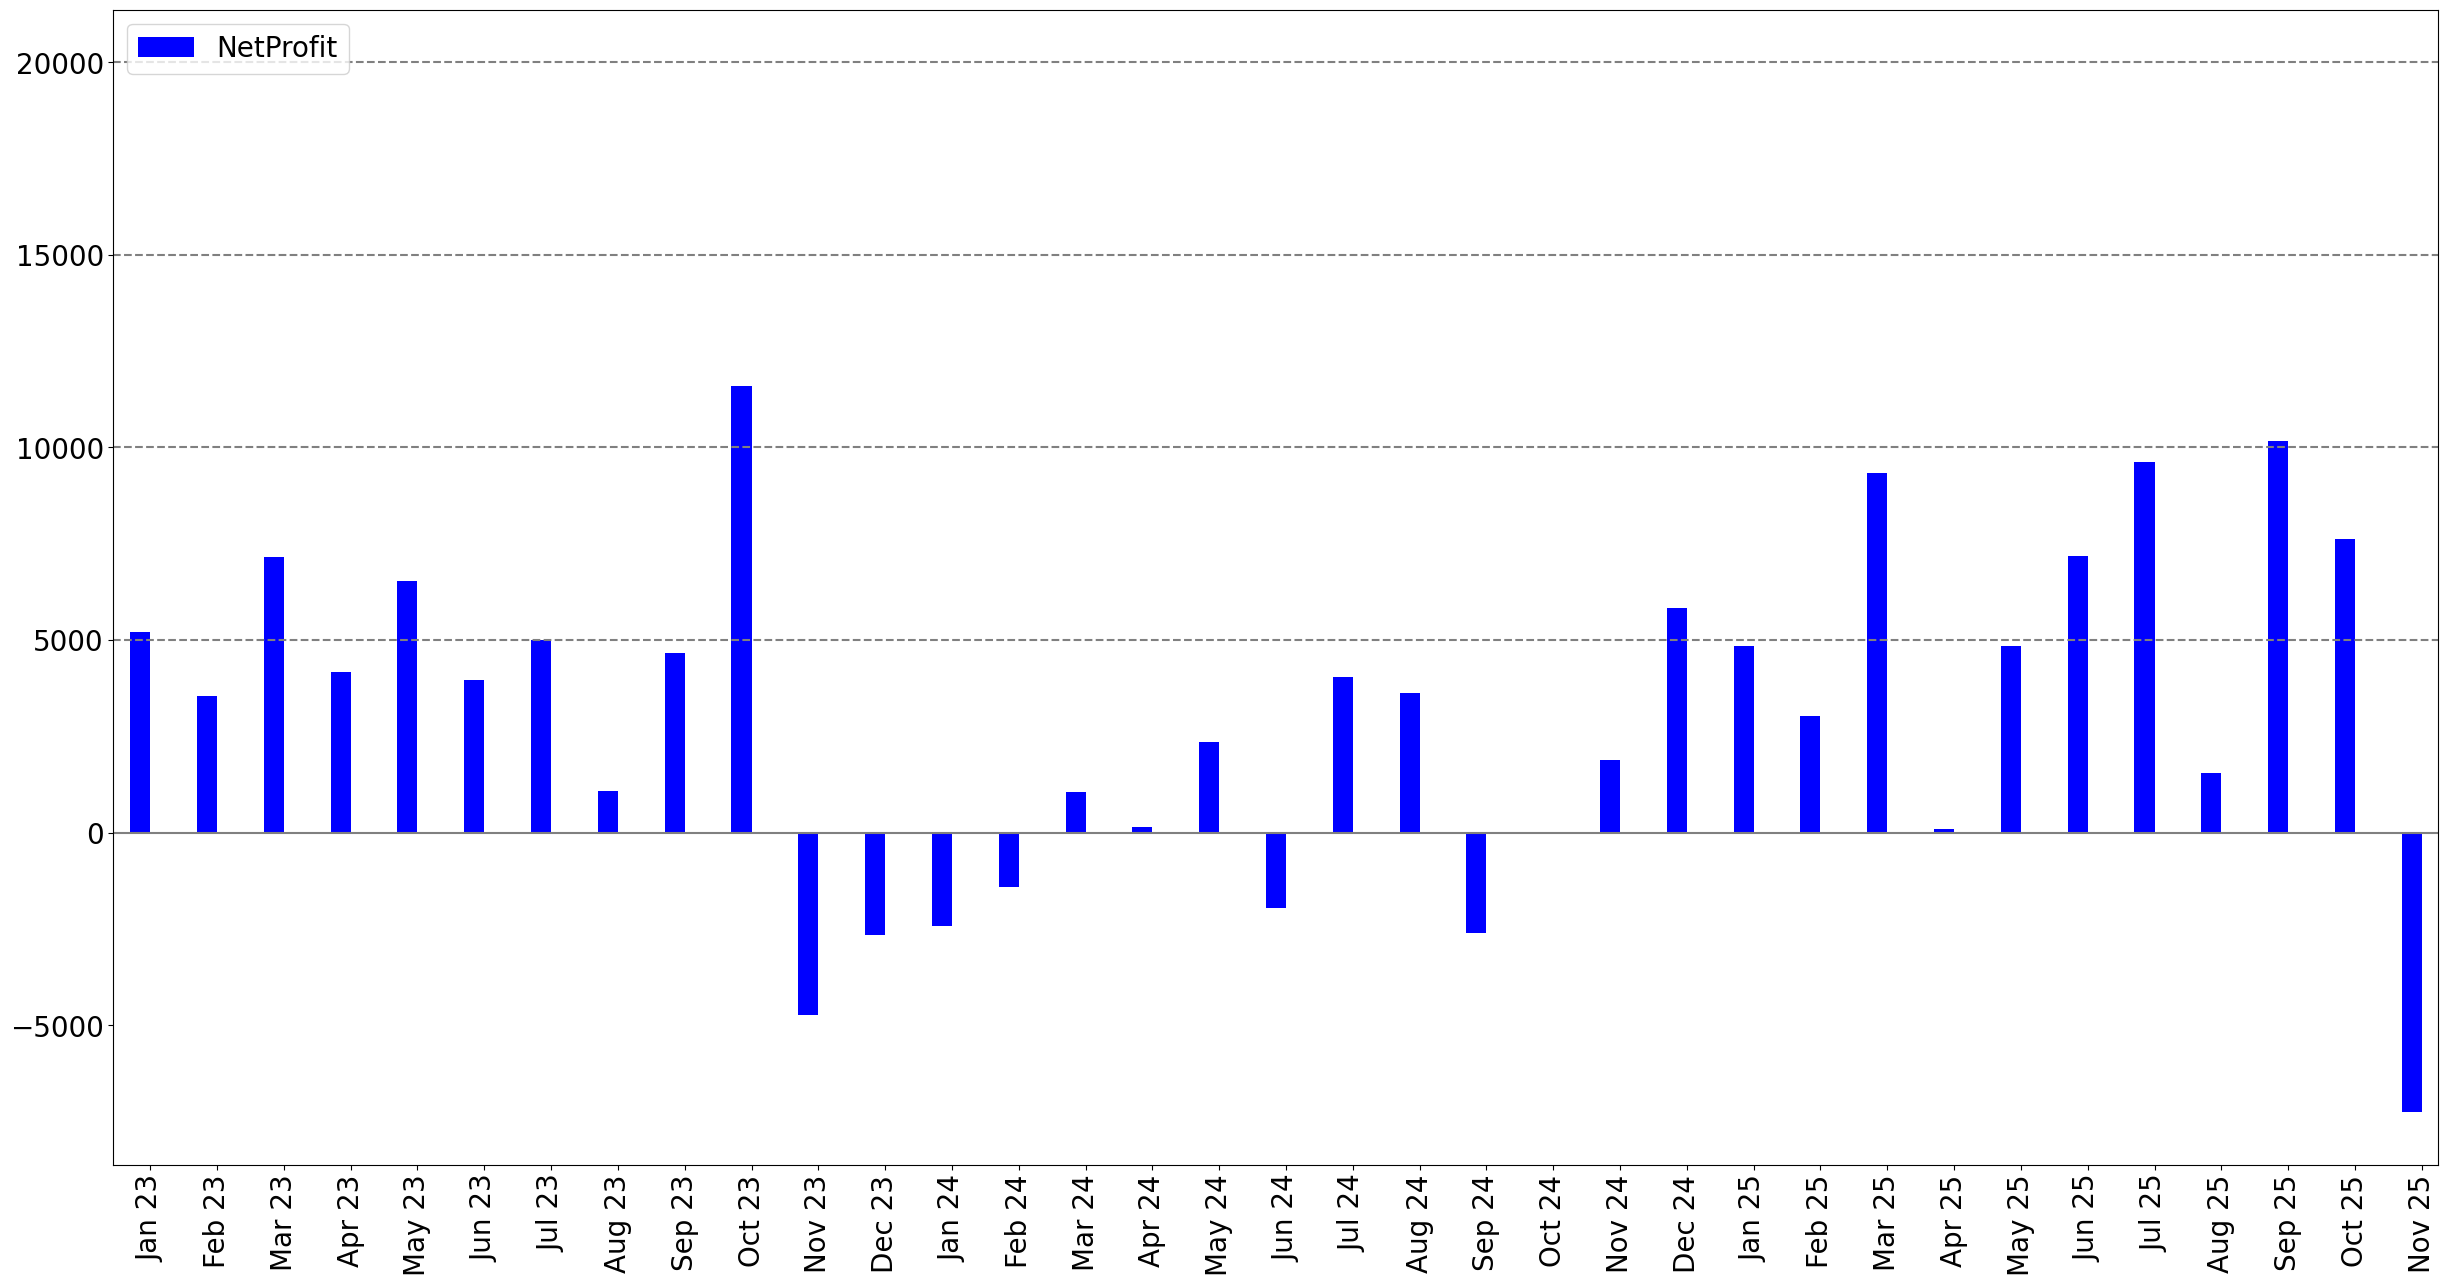

In [6]:
plot_properties_net_income(dfPty,start,end)

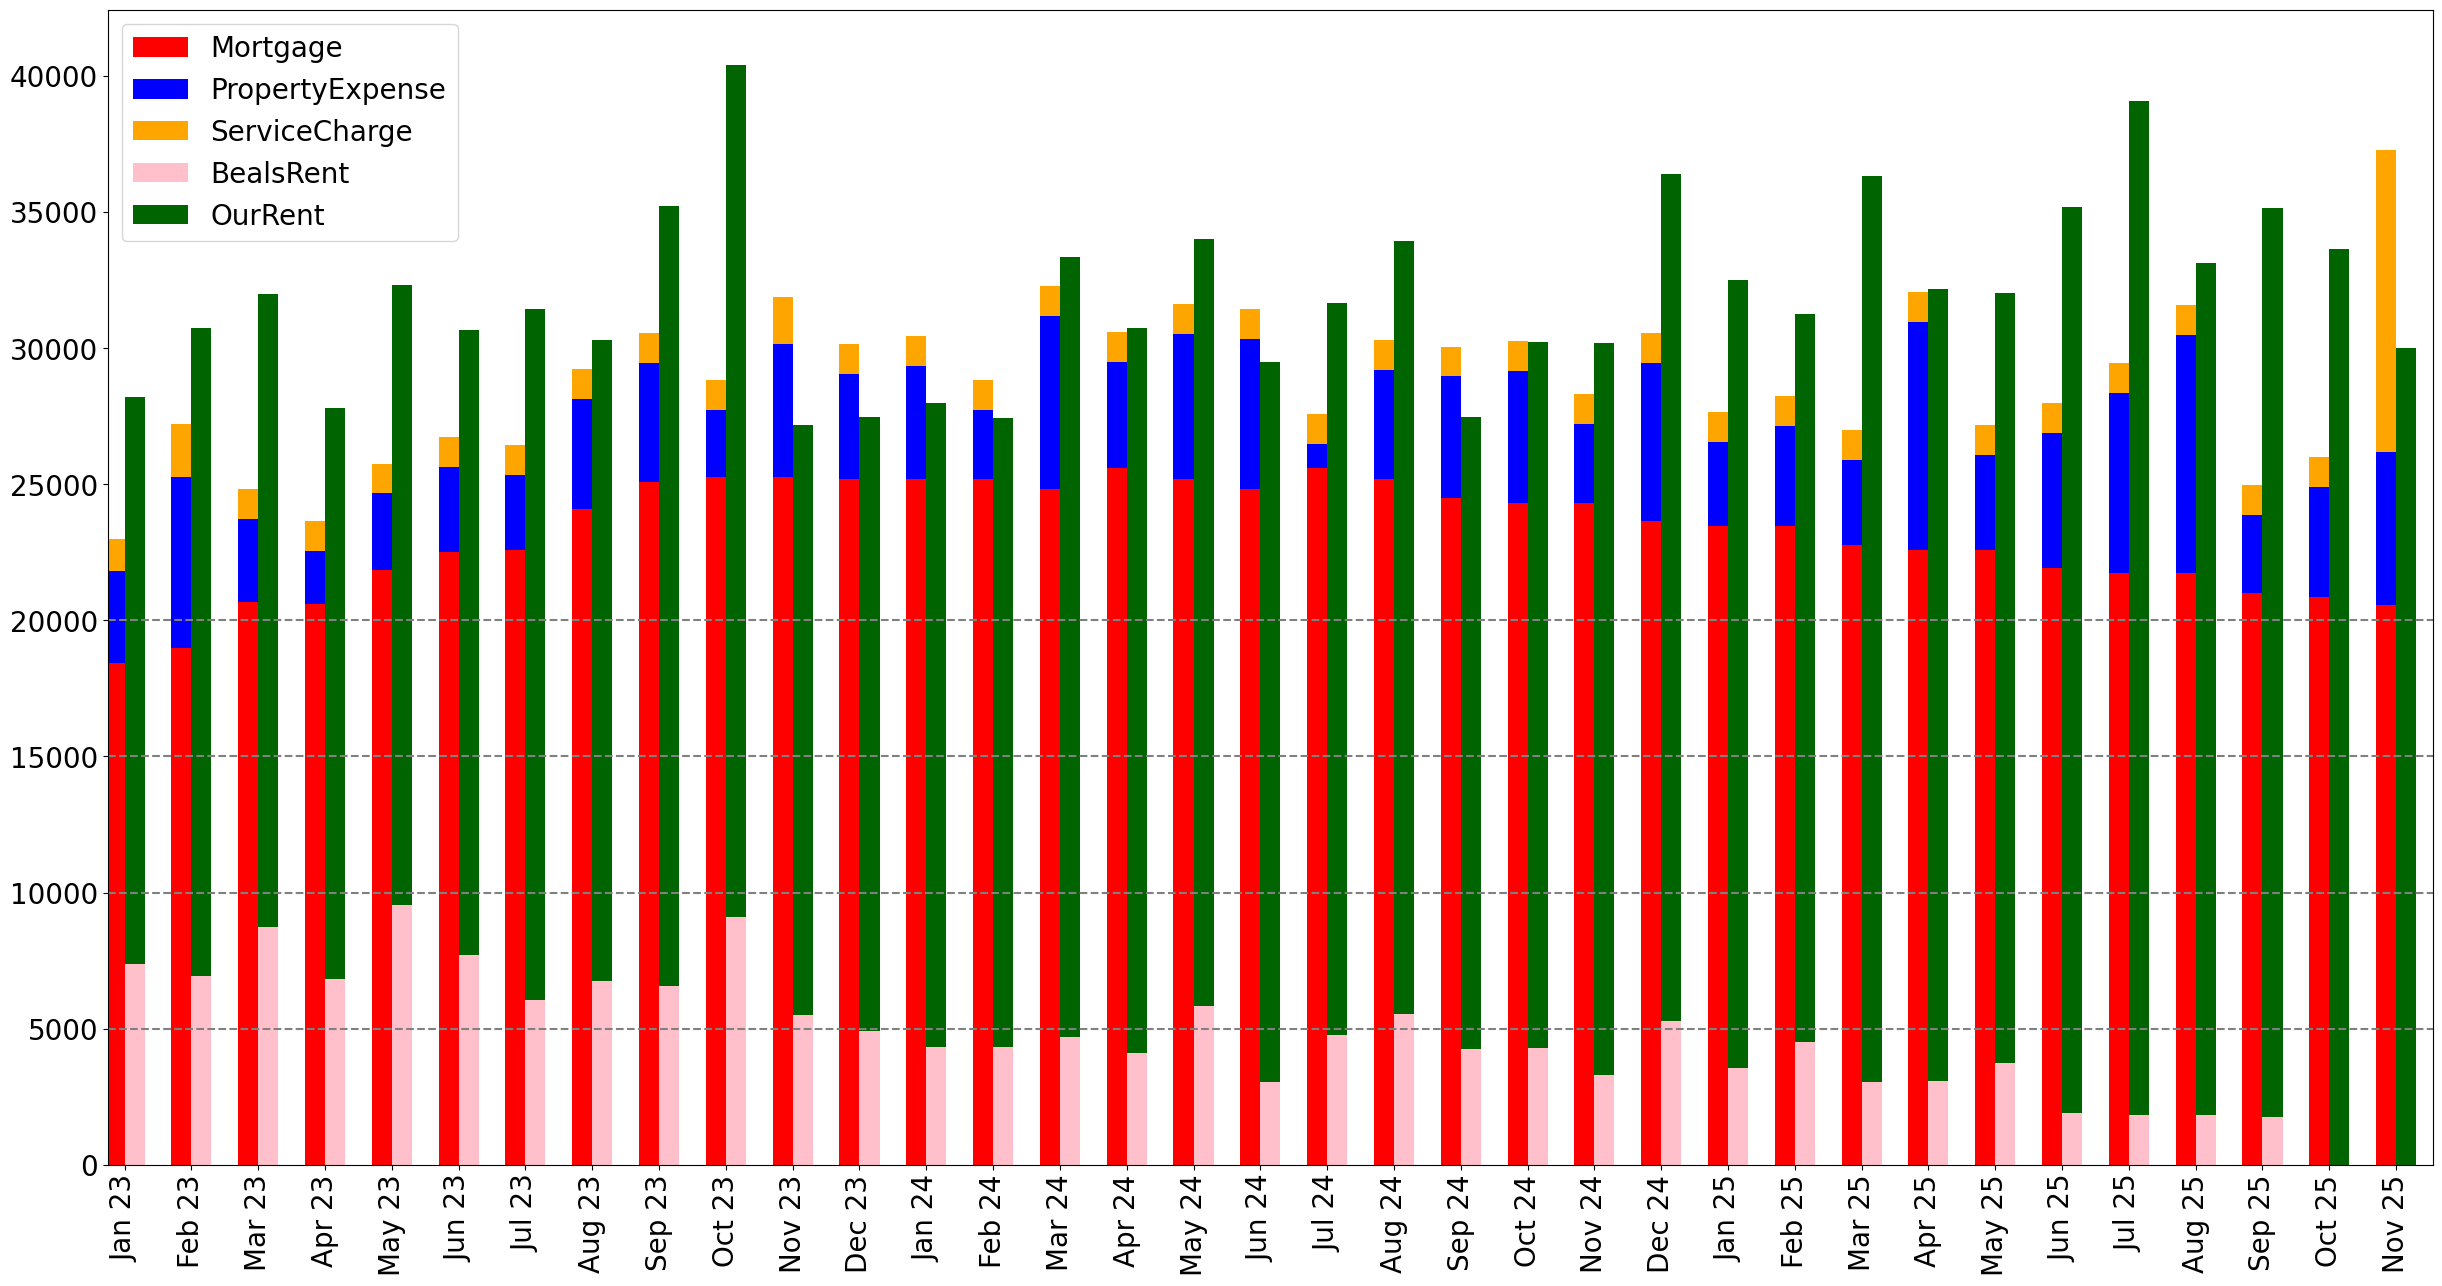

In [7]:
plot_properties_income_expenditure(dfPty,start,end)

### Outgoings Summary

- Includes School Fee, Hilltop, Direct Debits, CardPayments, HMRC

In [8]:
dfOut=get_outgoings(dfAll)
dfOut.rename(columns={'TotalOther': 'Other'}, inplace=True)
dfOut.rename(columns={'TotalOutgoings': 'TotalOutgoings'}, inplace=True)
dfOut.rename(columns={'TotalOutgoingsExclSchool': 'OutgoingsExSF'}, inplace=True)
#format_summary_table(dfOut[['IVPersonal','IVCar','Hilltop','RegularPayment','SFLoan','SchoolFee','HMRC','Other','OutgoingsExSF','TotalOutgoings']], date_format='%b %y')
cols = ['IVPersonal','IVCar','Hilltop','RegularPayment','SFLoan',
        'SchoolFee','HMRC','Other','OutgoingsExSF','TotalOutgoings']
format_with_year_footers(dfOut[cols], date_format='%b %y')

# !!! Excluding MT columns (see above)

,IVPersonal,IVCar,Hilltop,RegularPayment,SFLoan,SchoolFee,HMRC,Other,OutgoingsExSF,TotalOutgoings
Jan 23,"-3,443",0,-300,-660,-437,"-5,685",-600,-116,"-5,119","-10,804"
Feb 23,"-2,964",0,-300,-469,-437,"-5,685",-600,-119,"-4,452","-10,137"
Mar 23,"-3,380",0,-300,-514,-437,"-5,685",-868,-77,"-5,140","-10,824"
Apr 23,"-2,531",0,-300,-719,-437,0,-300,-35,"-3,885","-3,885"
May 23,"-2,562",0,-300,-554,-437,"-5,678",-300,-13,"-3,729","-9,407"
Jun 23,"-1,960",0,-300,-518,-437,"-5,678",-300,-10,"-3,087","-8,764"
Jul 23,"-2,300",0,-300,-722,-437,"-5,678",-300,-58,"-3,680","-9,358"
Aug 23,"-2,844",0,-300,-716,-437,0,-300,-43,"-4,202","-4,202"
Sep 23,"-2,053",-200,-300,-609,-437,"-5,076",-492,-25,"-3,679","-8,754"
Oct 23,"-2,762",-250,-300,-869,-437,500,-300,-11,"-4,492","-3,992"


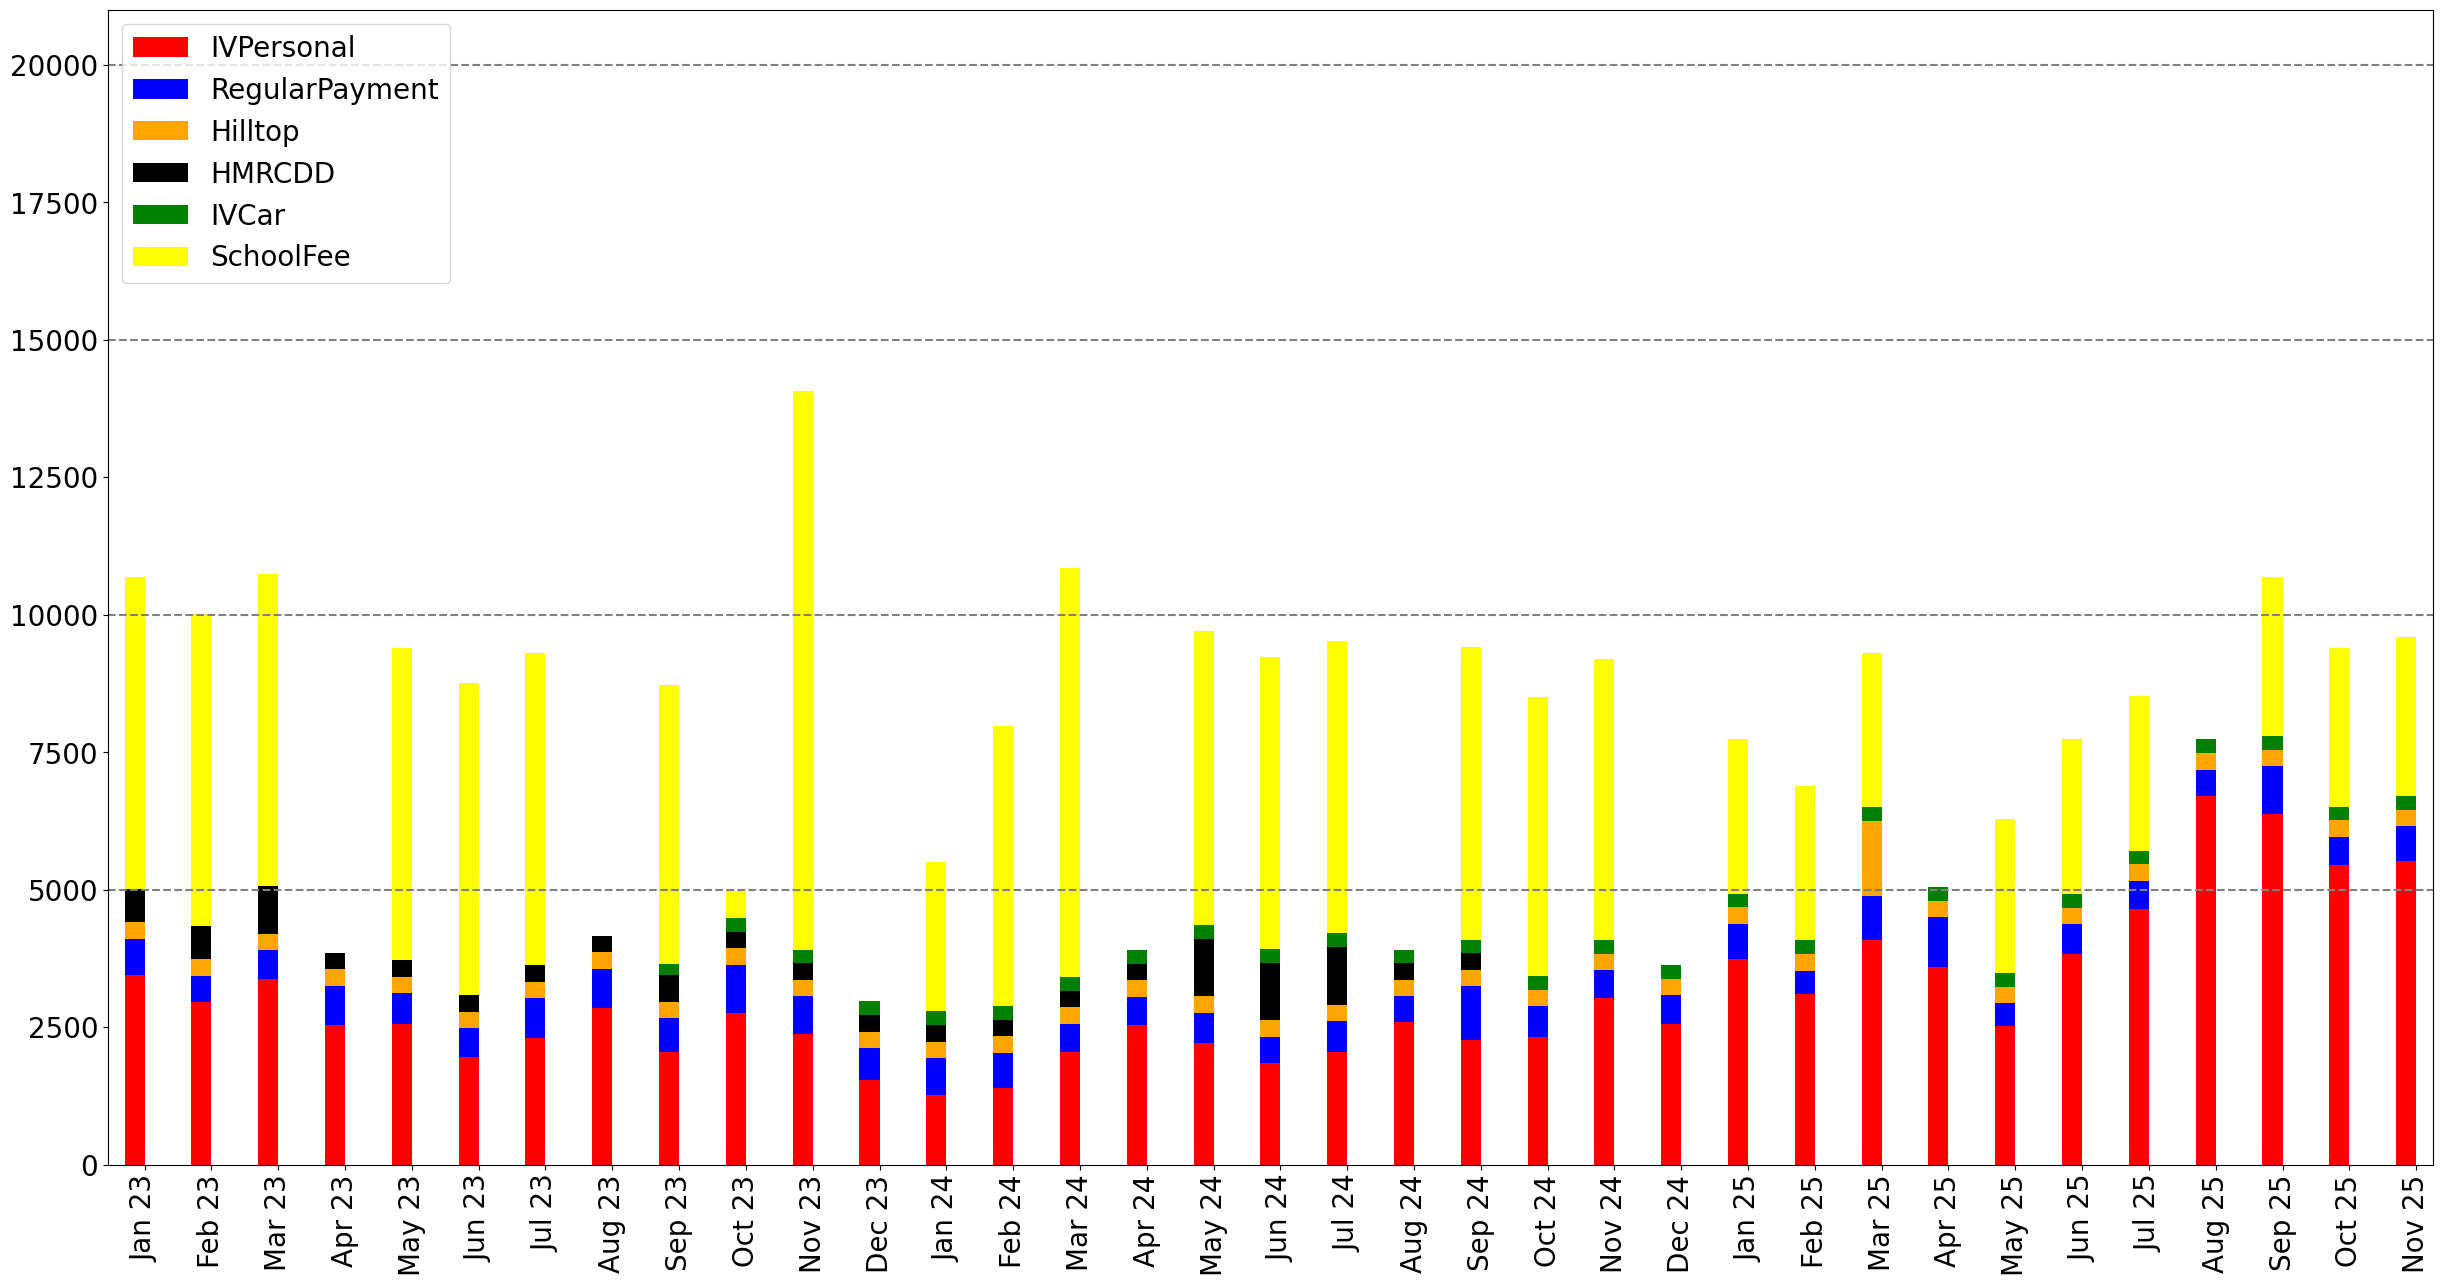

In [9]:
plot_outgoings(dfOut,start,end)

### Drawings

C:\Users\mathe\AppData\Local\Temp\ipykernel_47484\1449168249.py:229: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_idx = pd.date_range(start=start_ts, end=end_ts, freq='M')


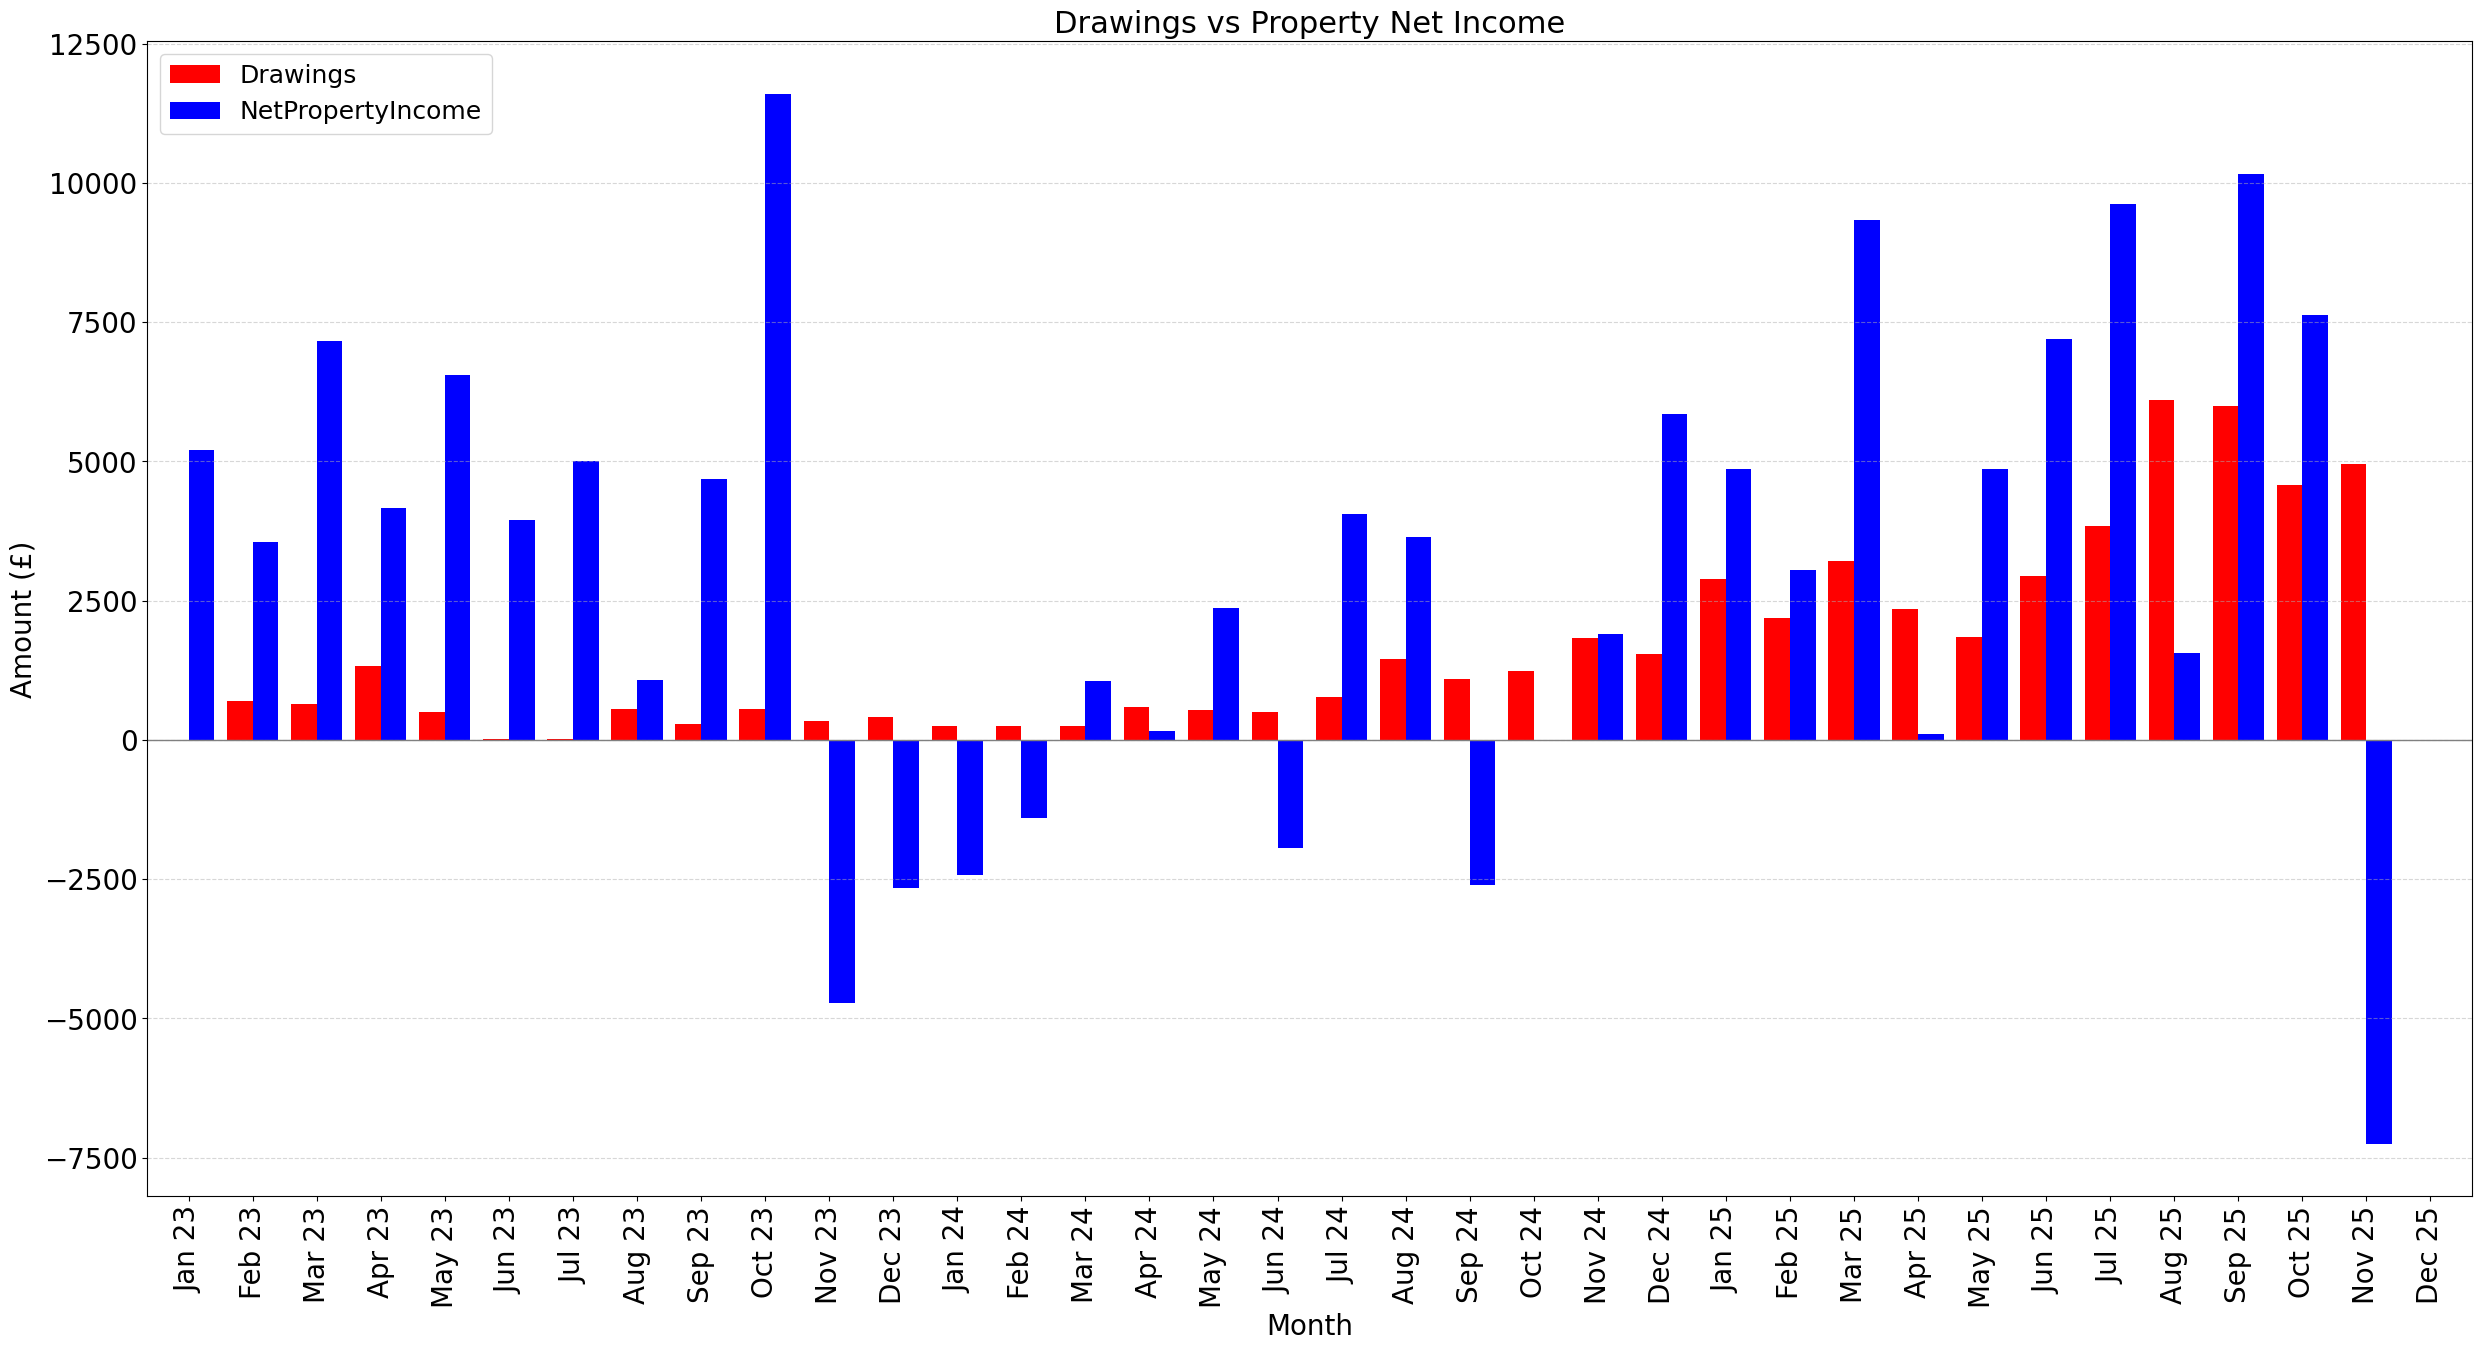

<Axes: title={'center': 'Drawings vs Property Net Income'}, xlabel='Month', ylabel='Amount (£)'>

In [10]:
plot_drawings_vs_property_net_bars(dfAll,dfPty,start,end)

### Personal Spending Summary

In [11]:
### Pie chart DDs and Card payments, excluding School Fee and HMRC

In [12]:
dfPsSummary=get_personal_spending_summary(dfAll)
dfPsSummary.tail(12)

,TotalPersonalExpense,Garage,Food,Body,Beauty,EatingOut,Coffee,Car,Amazon,Clothing,Household,Holiday,Cash,Other
2024-12-31,-4696.37,-323.76,-1660.56,-165.82,0.0,-42.05,-9.60,0.0,-290.71,-128.00,-19.70,0.00,0.0,-29.93
2025-01-31,-4282.77,-439.81,-1649.47,-75.22,0.0,-57.08,-24.57,0.0,-479.30,-73.98,-46.35,0.00,-100.0,-127.74
2025-02-28,-3127.51,-396.75,-1528.30,-308.28,0.0,-31.83,0.00,0.0,-20.47,-165.15,-83.03,0.00,-60.5,-65.95
2025-03-31,-4285.73,-304.71,-1647.68,-341.33,0.0,-58.84,-27.77,0.0,-72.08,-193.17,-56.28,0.00,-380.0,-1345.00
2025-04-30,-3859.95,-300.01,-1832.37,-497.95,0.0,-38.74,-3.30,0.0,-172.86,-446.11,-50.11,0.00,-181.0,-194.37
2025-05-31,-1633.14,-332.09,-1535.39,-227.84,0.0,-46.38,0.00,0.0,-105.56,-174.32,-136.58,0.00,-50.0,-246.81
2025-06-30,-5219.89,-347.91,-1645.50,-295.44,0.0,-232.34,0.00,0.0,-80.11,-153.03,-233.37,-564.31,-320.0,-594.52
2025-07-31,-4898.10,-305.96,-1548.41,-237.39,0.0,-80.33,0.00,0.0,-38.98,-691.35,-27.70,0.00,-80.5,37.86
2025-08-31,-7360.22,-335.08,-1319.47,-513.98,0.0,-120.70,-16.60,0.0,-185.28,-880.32,-139.40,-110.79,-80.0,-624.85
2025-09-30,-6840.52,-444.66,-1433.26,-149.95,0.0,-123.88,0.00,0.0,-225.83,-623.62,-34.81,-282.88,-50.0,-106.65


### Regular Payments

In [13]:
dfAll.loc[(dfAll.Account=='20-74-09 40406538')&(dfAll.Cat=='RegularPayment')]['2025-09-01':'2025-09-30'][['Account','Amount','Memo','Cat','Subcat']]

,Account,Amount,Memo,Cat,Subcat
2025-09-02,20-74-09 40406538,-28.68,PNET5304976-1 PNET5304976-1 DDR,RegularPayment,NaN
2025-09-09,20-74-09 40406538,-8.00,ID MOBILE LIMITED 12253154/001 DDR,RegularPayment,NaN


In [14]:
dfAll.loc[(dfAll.Account=='20-53-97 30728691')&(dfAll.Cat=='RegularPayment')]['2025-09-01':'2025-09-30'][['Account','Amount','Memo','Cat','Subcat']]

,Account,Amount,Memo,Cat,Subcat
2025-09-02,20-53-97 30728691,-37.95,L&G INSURANCE MI 0114399215-250902 DDR,RegularPayment,NaN
2025-09-03,20-53-97 30728691,-325.50,DVLA-YP70DJJ 000000000060776157 DD,RegularPayment,NaN
2025-09-12,20-53-97 30728691,-37.68,AVIVA LIFE 014033997 DDR,RegularPayment,NaN
2025-09-22,20-53-97 30728691,-10.00,ID MOBILE LIMITED 11245718/001 DDR,RegularPayment,NaN
2025-09-23,20-53-97 30728691,-10.00,ID MOBILE LIMITED 11888885/001 DDR,RegularPayment,NaN
2025-09-26,20-53-97 30728691,-27.42,H3G 980404269602200093 DD,RegularPayment,NaN
2025-09-29,20-53-97 30728691,-497.58,TOGETHER COMMERCIA 10279063 DDR,RegularPayment,SFLoan


In [15]:
dfAll.loc[(dfAll.Account=='20-74-09 60458872')&(dfAll.Cat=='RegularPayment')]['2025-09-01':'2025-09-30'][['Account','Amount','Memo','Cat','Subcat']]

,Account,Amount,Memo,Cat,Subcat
2025-09-01,20-74-09 60458872,-42.43,EE LIMITED Q13077400650106838 DD,RegularPayment,NaN
2025-09-01,20-74-09 60458872,-50.00,NATIONWIDE 0604/229172770 STO,RegularPayment,NaN
2025-09-02,20-74-09 60458872,-119.48,PIC RE ARGOS PET PETAG934657920001 DDR,RegularPayment,NaN
2025-09-02,20-74-09 60458872,-52.10,PAYPAL PAYMENT 5CM22229DF5GW DDR,RegularPayment,NaN
2025-09-04,20-74-09 60458872,-10.00,UNITY MUTUAL KU CT PL684048A VALENTNO ST,RegularPayment,NaN
2025-09-04,20-74-09 60458872,-10.00,SHEPHERDS FRIENDLY PN026484A DDR,RegularPayment,NaN
2025-09-15,20-74-09 60458872,-19.99,Spotify Limited ON 13 SEP BCC,RegularPayment,NaN
2025-09-17,20-74-09 60458872,-18.99,PAYPAL PAYMENT 5CM22229DF5GW DDR,RegularPayment,NaN
2025-09-24,20-74-09 60458872,-56.12,PAYPAL PAYMENT 5CM22229DF5GW DDR,RegularPayment,NaN


Notes on regular payments:
- 6045 Paypal payment of £15.99 is for Netflix

### Personal Debt

Monthly amounts for personal debt.

In [16]:
get_monthly_personal_debt(dfAll)

,PayPal,BankInterest,Total
Jan 23,32.47,0.00,32.47
Feb 23,15.99,118.58,134.57
Mar 23,15.99,77.27,93.26
Apr 23,33.99,33.83,67.82
May 23,15.99,13.01,29.00
Jun 23,29.13,9.64,38.77
Jul 23,140.45,18.20,158.65
Aug 23,171.99,42.73,214.72
Sep 23,138.18,24.75,162.93
Oct 23,32.15,10.88,43.03


### MT Contribution

Payments from MT Lloyds account into household 4040 account.

In [17]:
mt_contrib = get_monthly_mt_contribution(dfAll)
#mt_contrib

Text(0.5, 0, 'Month')

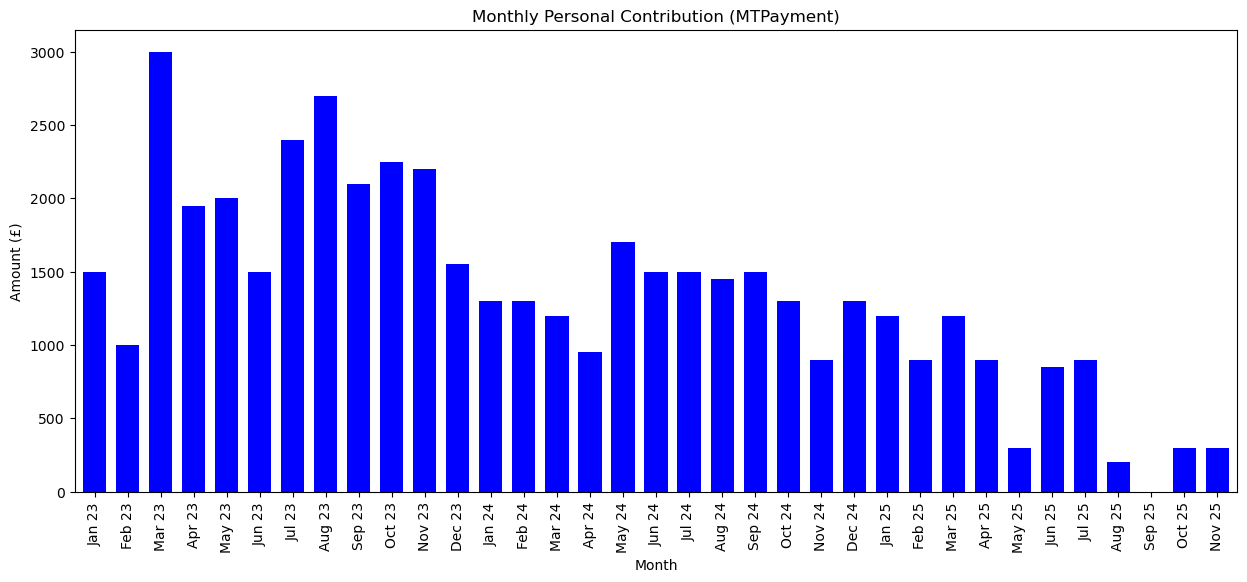

In [18]:
mt_contrib.plot.bar(
    figsize=(15, 6),
    color='blue',
    legend=False,
    width=0.7
)
plt.title("Monthly Personal Contribution (MTPayment)")
plt.ylabel("Amount (£)")
plt.xlabel("Month")
#plt.grid(axis='y', linestyle='--', alpha=0.7)


### Notes

Need to see what Together loan is. £500.
Pay off Paypal and bank overdraft. £230.
Include lloyds - my car and other person SF loan.

In [19]:
# project earnings for 5 years
# do pros cons analysis
# get_personal_spending_summary to dynamically get subcats
# download all lloyds and incorporate into above
# what spend to SF?